# Instrumented analysis of three jump types using an Axivity AX3 accelerometer

This document presents a detailed analysis of three types of jumps:

• a jump without arm movement  
• a jump with arm movement  
• a jump with arm movement combined with a run-up

The objective of the analysis is to study the impact of the arms movement on a vertical jump , as observed by Yamashita and al., as well as the run-up, as observed by Bouhedja and al.

The Axivity AX3 accelerometer, placed on the wrist, recorded raw acceleration along the X, Y and Z axes.

The aim of this study is to extract and compare the parameters associated with each jump type, using data from the AX3.

Three scripts were used:

This report explains the purpose of each code, the metrics extracted, and the interpretation of the results.


# Load the Packages

In [ ]:
import os  # Allows interaction with the operating system such as paths and files
import numpy as np  # Provides numerical tools and efficient array operations
import matplotlib.pyplot as plt  # Enables plotting and data visualization
import pandas as pd  # Offers powerful tools for loading and manipulating structured data


# Create a function which renames CSV columns, converts the data types, and scales the acceleration components for further analysis

In [34]:
def load_and_convert(f):
    df = pd.read_csv(f, delimiter=",", skiprows=0)  # Reads the CSV file
    df.columns = ["t", "x", "y", "z"]  # Renames the columns

    df["t"] = pd.to_datetime(df["t"], format="%Y-%m-%d %H:%M:%S.%f")  # Converts time column
    df["x"] = pd.to_numeric(df["x"], errors="coerce", downcast="float")  # Converts x values
    df["y"] = pd.to_numeric(df["y"], errors="coerce", downcast="float")  # Converts y values
    df["z"] = pd.to_numeric(df["z"], errors="coerce", downcast="float")  # Converts z values

    df[["x", "y", "z"]] /= 256  # Scales the acceleration components
    return df

Once recorded, the data was exported in raw sensor units (1/256 g) with the date of each measure attached. SInced we knew the precise hour of each jump, it allowed us to match easily each jump with the corresponding acceleration spikes.

# Read data

In [ ]:
# Names of the files in the data folder
files = [
    'acc_data/24_11_raw.csv',
    'acc_data/23_10_25_raw_cut.csv'
]

# Loads and concatenates all files
df_list = [load_and_convert(f) for f in files]
data = pd.concat(df_list, ignore_index=True)

print(data.shape)
print(data.head())
print(data.info())

NameError: name 'load_and_convert' is not defined

# Plot data

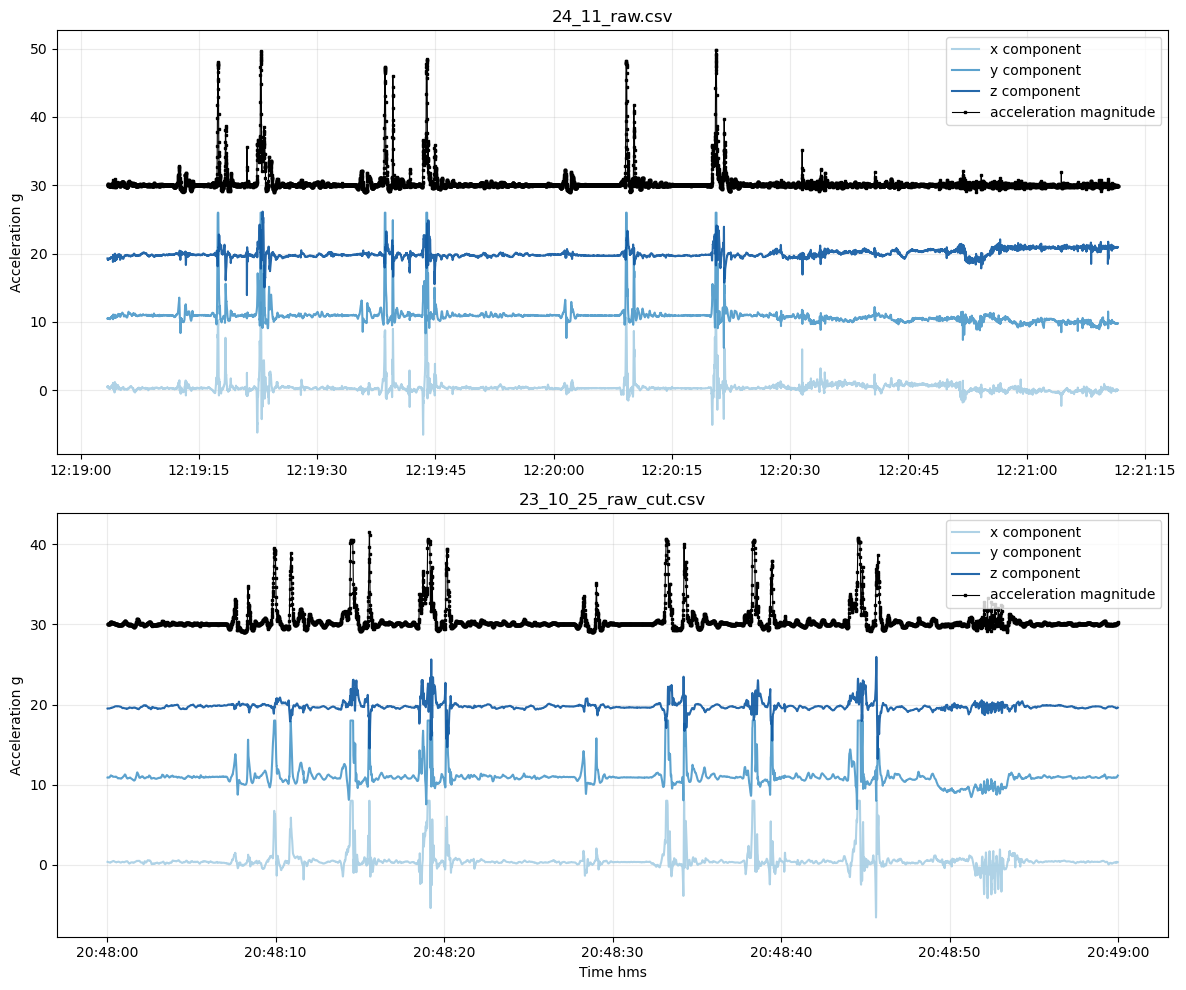

In [36]:
# Loads and converts all files in the list using the load_and_convert function
data_list = [load_and_convert(f) for f in files]

# Creates one subplot for each DataFrame so every file is displayed separately
fig, axes = plt.subplots(len(data_list), 1, figsize=(12, 10), sharex=False)

# creates three shades of blue function for plotting
def get_blue_colors():
    # Creates a blue color map and returns three shades of blue
    cmap = plt.cm.Blues  # Loads the blue colormap
    blue1 = cmap(0.35)   # Light shade of blue
    blue2 = cmap(0.60)   # Medium shade of blue
    blue3 = cmap(0.85)   # Dark shade of blue
    return blue1, blue2, blue3

blue1, blue2, blue3 = get_blue_colors()

# Iterates through every subplot, DataFrame, and file name at the same time
for ax, df, f in zip(axes, data_list, files):

    # Computes the magnitude of acceleration at each time point and substracts 1g for gravity
    acceleration = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2) - 1

    # Plots the x component of acceleration
    ax.plot(df["t"], -df["x"], color=blue1, alpha=0.9, label="x component")

    # Plots the y component and shifts it upward to avoid overlapping curves
    ax.plot(df["t"], -df["y"] + 10, color=blue2, alpha=0.9, label="y component")

    # Plots the z component and shifts it further upward to improve readability
    ax.plot(df["t"], -df["z"] + 20, color=blue3, alpha=0.9, label="z component")

    # Plots the total acceleration magnitude and shifts it again for clarity
    ax.plot(
        df["t"],
        acceleration + 30,
        color="k",
        marker="s",
        markersize=2,
        linewidth=0.8,
        label="acceleration magnitude"
    )

    # Displays the file name as the title of the subplot
    ax.set_title(os.path.basename(f))

    # Sets the vertical axis label for the subplot
    ax.set_ylabel("Acceleration g")

    # Adds a light grid to make the reading of the curves easier
    ax.grid(True, alpha=0.25)

    # Displays the legend containing the curve names
    ax.legend(loc="upper right")


# Adds a label to the horizontal axis for the last subplot only
axes[-1].set_xlabel("Time hms")

# Adjusts spacing so that titles, axes, and labels do not overlap
plt.tight_layout()

# Renders the final figure on screen
plt.show()


## Description of jump sequences

The figure display the accelration along the sensor's X, Y and Z axis, as well as the combined acceleration.
The first subfigure (*24_11_raw.csv*) shows the acceleration recorded during three sequences of three consecutive jumps. Each sequence consists of, in the following order:
- One jump without arm movement
- One jump with arm movement
- One jump with arm movement and a run-up

The first sequence began at 12:19:10, the second at 12:19:35 and the third at 12:20:00.

The second subfigure (*23_10_25_raw_cut.csv*) show accelrations during two sequences of one jump without arm movement and three jumps with arm movement.

## Sensor placement and axis study

Due to the placement of the accelerometer wristlet, the acceleration along the body's vertical axis is recorded along the accelerometer's X and Y-axis. The acceleration recorded the accelerometer's Z-axis corresponds to transverse movements and is thus lower than along the X-axis and Y-axis.

Furthermore, 1 g was substracted to the total acceleration magnitude to account for the effects of gravity.

# Plots the data as a function of points and cuts the signal for a single window analysis by file

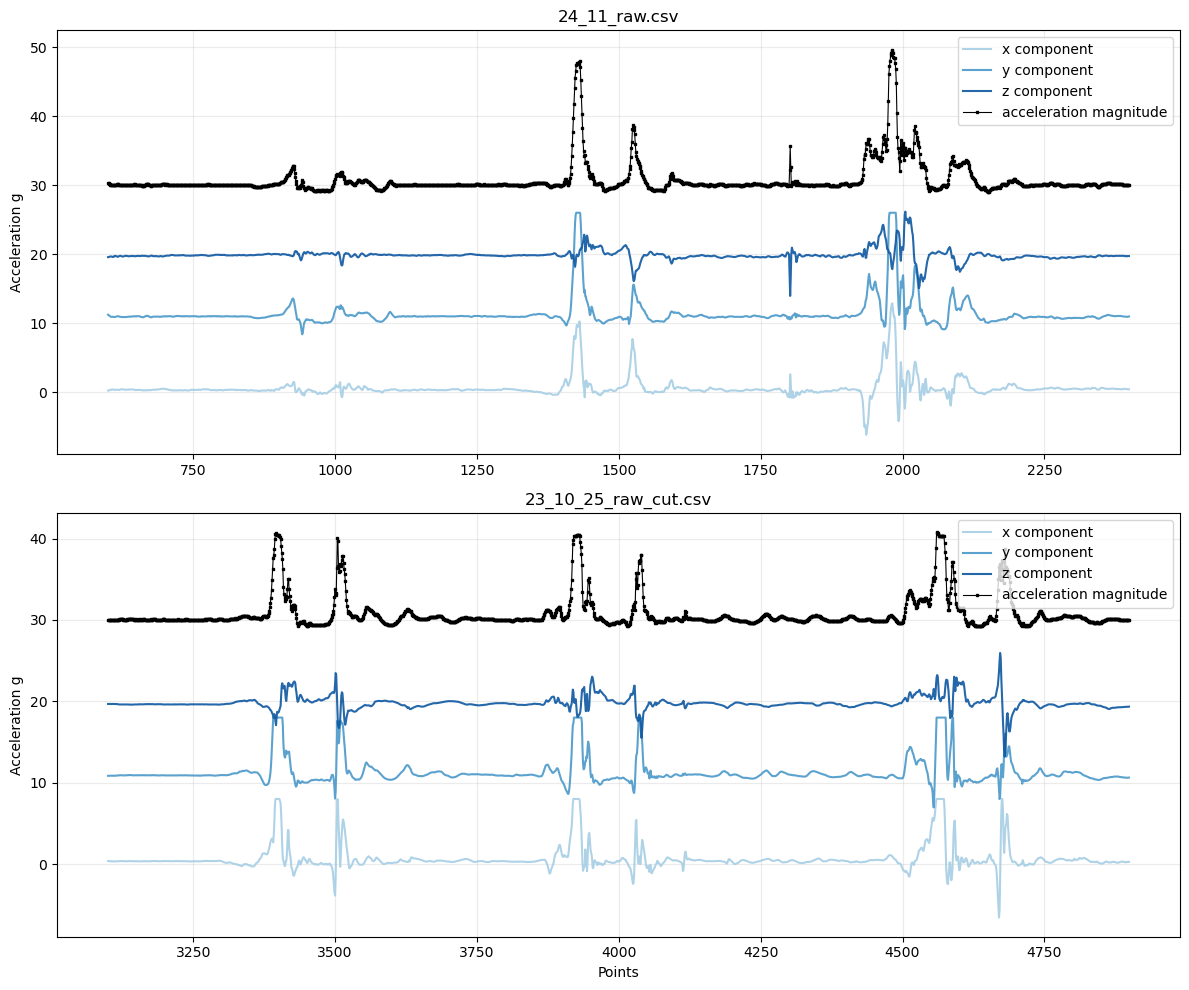

In [37]:
# Ranges of points to extract for each file
ranges = [
    (600, 2400),    # Range applied to data_list[0]
    (3100, 4900)    # Range applied to data_list[1]
]

# Creates one subplot per file
fig, axes = plt.subplots(len(data_list), 1, figsize=(12, 10))

# Retrieves three shades of blue from the function
blue1, blue2, blue3 = get_blue_colors()

# Iterates through subplots, DataFrames, filenames, and ranges at once
for ax, df, f, (start, end) in zip(axes, data_list, files, ranges):

    # Selects the portion of the data corresponding to the chosen range
    sub = df.iloc[start:end].copy()

    # Computes the magnitude of acceleration for the selected interval
    acceleration = np.sqrt(sub["x"]**2 + sub["y"]**2 + sub["z"]**2) - 1

    # Plots the x component of acceleration
    ax.plot(-sub["x"], color=blue1, alpha=0.9, label="x component")

    # Plots the y component shifted upward for readability
    ax.plot(-sub["y"] + 10, color=blue2, alpha=0.9, label="y component")

    # Plots the z component shifted further upward
    ax.plot(-sub["z"] + 20, color=blue3, alpha=0.9, label="z component")

    # Plots the acceleration magnitude and shifts it again
    ax.plot(
        acceleration + 30,
        color="k",
        marker="s",
        markersize=2,
        linewidth=0.8,
        label="acceleration magnitude"
    )

    # Adds a label to the vertical axis
    ax.set_ylabel("Acceleration g")

    # Adds a light grid to help reading the curves
    ax.grid(True, alpha=0.25)

    # Displays the legend for each subplot
    ax.legend(loc="upper right")

    # Displays the file name as the title of the subplot
    ax.set_title(os.path.basename(f))

# Adds the x axis label to the last subplot only
axes[-1].set_xlabel("Points")

# Adjusts layout spacing for clean display
plt.tight_layout()

# Displays the final figure
plt.show()


# Extracts specific point ranges from each acceleration dataset and plots their x, y, z components and magnitude

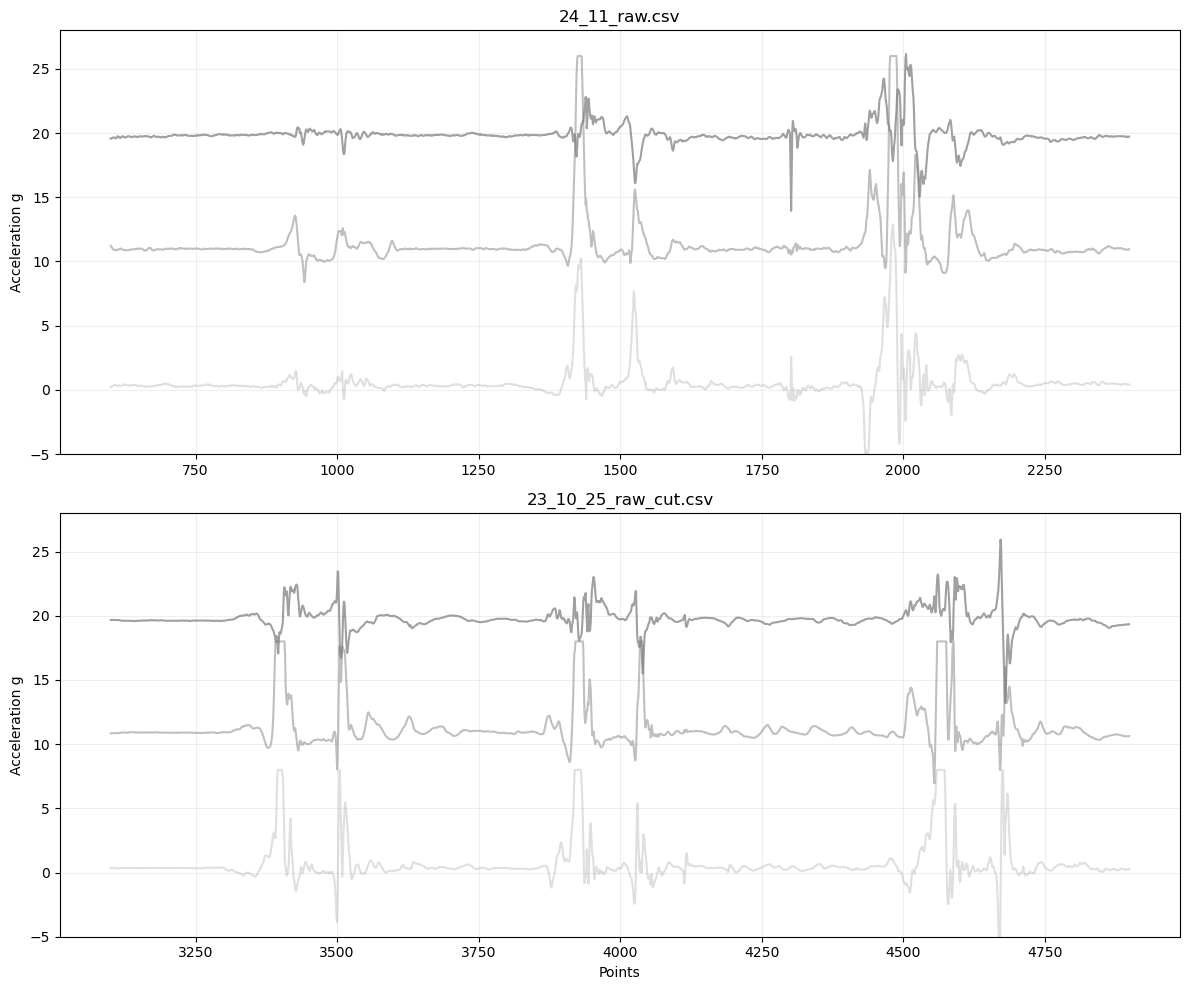

In [38]:
# Ranges of points to extract for each file
ranges = [
    (600, 2400),    # Range for data_list[0]
    (3100, 4900)    # Range for data_list[1]
]

# Creates one subplot for each DataFrame
fig, axes = plt.subplots(len(data_list), 1, figsize=(12, 10))

# Iterates through each subplot, DataFrame, filename, and point range
for ax, df, f, (start, end) in zip(axes, data_list, files, ranges):

    # Extracts the selected range of rows from the DataFrame
    sub = df.iloc[start:end].copy()

    # Computes the magnitude of acceleration for the selected interval
    acceleration = (
        np.sqrt(sub["x"]**2 + sub["y"]**2 + sub["z"]**2) - 1
    )

    # Plots the x component of acceleration
    ax.plot(-sub["x"], color="gray", alpha=0.25, label="x component")

    # Plots the y component shifted upward to improve readability
    ax.plot(-sub["y"] + 10, color="gray", alpha=0.5, label="y component")

    # Plots the z component shifted even higher
    ax.plot(-sub["z"] + 20, color="gray", alpha=0.75, label="z component")

    # Plots the acceleration magnitude shifted upward again
    ax.plot(acceleration + 30, color="k", label="acceleration magnitude")

    # Sets the title to the current file name
    ax.set_title(os.path.basename(f))

    # Label for the vertical axis
    ax.set_ylabel("Acceleration g")

    # Y axis limits for consistent visual scale
    ax.set_ylim([-5, 28])

    # Adds a light grid for readability
    ax.grid(True, alpha=0.2)

# Adds the horizontal axis label to the last subplot only
axes[-1].set_xlabel("Points")

# Adjusts spacing between plots for clean display
plt.tight_layout()

# Displays the final figure
plt.show()


In [39]:
# Extraction of the max acceleration along the X-axis for each jump

jump_sequence_x = -data_list[0]["x"]  # Selects the x component from the first DataFrame (negated to account for the sensor orientation)

ranges = [(850, 1150), (1350, 1650), (1775, 2250)]
jump_x_accs = []

print("Maximum X-axis acceleration for each jump:")
for i, (start, end) in enumerate(ranges):
    # Extract the x-acceleration for the relevant jump
    sub = jump_sequence_x.iloc[start:end].copy()
    # Store the max acceleration in a list for use during ratio calculation
    jump_x_accs.append(sub.max())  # Negate to get the actual maximum acceleration


    print(f"Jump {i + 1}: {jump_x_accs[i]:.2f} g")

# Ratio of the maximum accelerations between jumps
print("\nRatios of maximum X-axis accelerations between jumps:")
print(f"With arms movement / Without arms movement: {jump_x_accs[1] / jump_x_accs[0]:.2f}")
print(f"With arms movement and run-up / With arms movement: {jump_x_accs[2] / jump_x_accs[1]:.2f}")
print(f"With arms movement and run-up / Without arms movement: {jump_x_accs[2] / jump_x_accs[0]:.2f}")

Maximum X-axis acceleration for each jump:
Jump 1: 1.47 g
Jump 2: 10.25 g
Jump 3: 12.88 g

Ratios of maximum X-axis accelerations between jumps:
With arms movement / Without arms movement: 6.98
With arms movement and run-up / With arms movement: 1.26
With arms movement and run-up / Without arms movement: 8.77


# Graph interpretation

By zooming on a three jump sequence, we can see that the acceleration is higher along the sensor's X-axis and Y-axis than the Z-axis, which matches the arm's movement.

On November 24, it can be noted that the acceleration along the Y-axis exceeds the max range of the sensor of 16 g during the two jumps with arms movement. It is however possible to compare the acceleration peaks corresponding to each jump, which gives the following results :

Jump | X-acceleration peak (g) | Acceleration without arms movement ratio
---|---|---
Without arms movement | 1.47 | 1
With arms movement | 10.25 | 6.98
With arms movement and run-up | 12.88 | 8.77

The acceleration peak is thus lowest for the jump without arms movement and highest with arms movement, which matches our initial hypothesis.

# Conclusion

The analysis of the files from October 23 and October 24 highlights a clear progression in acceleration across the different jump conditions.

The results consistently show that:

• jumps without arm movement exhibit the lowest peaks  
• jumps with arm movement produce higher peaks  
• jumps with arm movement combined with a run-up generate the highest peaks  

This progression aligns with biomechanical expectations: adding arm motion and then a run-up increases the vertical impulse applied to the ground, resulting in a higher maximum vertical acceleration.

It is important to note that the Axivity measures acceleration, not jump height. The increase in the peak (max) therefore serves as an indirect indicator of push-off power and potential height, but it does not directly measure the height reached.  
For this reason, **the actual jump height will be verified using the software Kinovea**, which will provide an objective video-based measurement of center-of-mass elevation using a video recording.

This analysis is based on five trials per condition. A study including more repetitions would improve the robustness of the conclusions and allow assessment of within-subject variability. Despite this limitation, the results show that extracting the peak (max) provides a simple, reliable, and reproducible indicator for comparing the intensity of different jump strategies.


# References

- Yamashita D, Henderson FJ, Ishida Y. Assessing the Contribution of Arm Swing to Countermovement Jump Height Using Three Different Measurement Methods in Physically Active Men. *Biomechanics*. 2025; 5(3):45. https://doi.org/10.3390/biomechanics5030045
- Bouhedja T., Hamida M.L., Djemai H., Influence de la vitesse sur la détente verticale lors de l’exécution du smash en volley-ball, *Science & Sports*,Volume 36(3), 2021, e121-e129, ISSN 0765-1597, https://doi.org/10.1016/j.scispo.2020.07.004. (https://www.sciencedirect.com/science/article/pii/S0765159720301830)
